In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load data

In [5]:
df = pd.read_csv("data_cleaned.csv")

In [36]:
print(df.columns)

Index(['url', 'name', 'owner', 'forks', 'watchers', 'stars', 'languages',
       'commits', 'creation_date', 'contributors', 'topics', 'subscribers',
       'readme', 'releases', 'pull_requests', 'readme_size', 'commits_freq',
       'releases_freq', 'lines_of_codes', 'popularity_score_1',
       'popularity_score_2', 'popularity_score_3', 'releases_count',
       'forks_outlier_flag', 'watchers_outlier_flag', 'stars_outlier_flag',
       'commits_freq_outlier_flag', 'subscribers_outlier_flag',
       'releases_freq_outlier_flag', 'pull_requests_outlier_flag',
       'readme_size_outlier_flag', 'lines_of_codes_outlier_flag'],
      dtype='object')


### functions from prepare_data.py

In [56]:
def convert_columns_to_float32(df, columns):
    for col in columns:
        df[col] = df[col].astype('float32')
    return df

def prepare_data(input_columns, target_column, df_cleaned):
    df_cleaned = convert_columns_to_float32(df_cleaned, input_columns+[target_column])

    # Extract the input and target data
    X = df_cleaned[input_columns]
    y = df_cleaned[target_column]

    # Split the data into training and testing sets with a fixed random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize using only training set statistics
    dtypes = list(zip(X.dtypes.index, map(str, X.dtypes)))
    for k, dtype in dtypes:
        if dtype == "float32":
            mean = X_train[k].mean()
            std = X_train[k].std()

            # Apply normalization
            X_train.loc[:, k] = (X_train[k] - mean) / std
            X_test.loc[:, k] = (X_test[k] - mean) / std

    # print("X_train: {}".format(X_train.shape))
    # print("y_train: {}".format(y_train.shape))
    # print("X_test: {}".format(X_test.shape))
    # print("y_test: {}".format(y_test.shape))

    return X_train, X_test, y_train, y_test, dtypes

### Train Linear Regression model

In [52]:
def linear_regression(features, target, df):
    # get train and test data
    X_train, X_test, y_train, y_test, dtypes = prepare_data(features, target, df)

    # train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # print score
    print(f"R² score: {model.score(X_test, y_test)}")

    # get coefficients
    feature_coef = pd.DataFrame({'feature': features, 'coefficient': model.coef_})
    feature_coef = feature_coef.sort_values(by='coefficient')

    # create plot
    plt.figure(figsize=(10, 5))
    plt.barh(feature_coef['feature'], feature_coef['coefficient'], color='skyblue')
    plt.xlabel("Feature Importance (Coefficient)")
    plt.ylabel("Features")
    plt.title("Feature Importance in Linear Regression")
    plt.show()

    print(feature_coef[::-1])

### stars as target

R² score: 0.9999999999997637


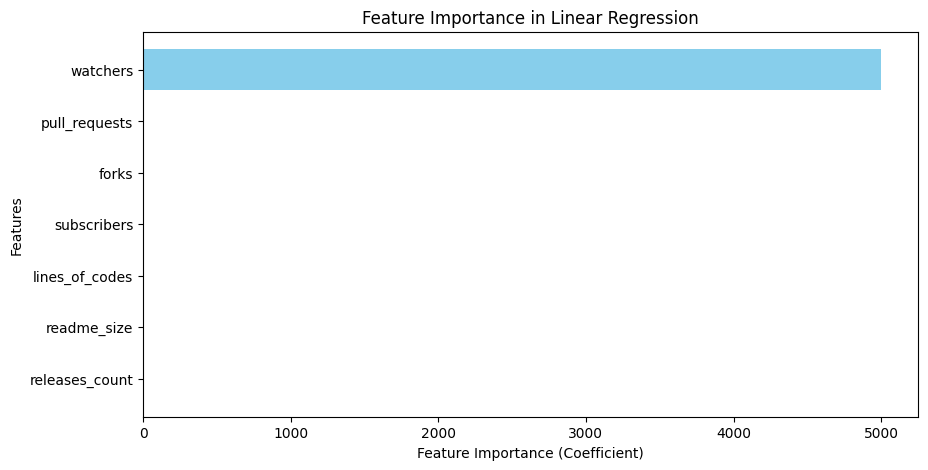

          feature  coefficient
1        watchers  5000.925781
4   pull_requests     0.000488
0           forks     0.000172
2     subscribers     0.000000
6  lines_of_codes    -0.000040
5     readme_size    -0.000122
3  releases_count    -0.000183


In [53]:
features = ['forks', 'watchers', 'subscribers', 'releases_count', 'pull_requests', 'readme_size', 'lines_of_codes']
linear_regression(features, 'stars', df)

### popularity_score_3 (star + fork) as target

R² score: 0.9820350556102011


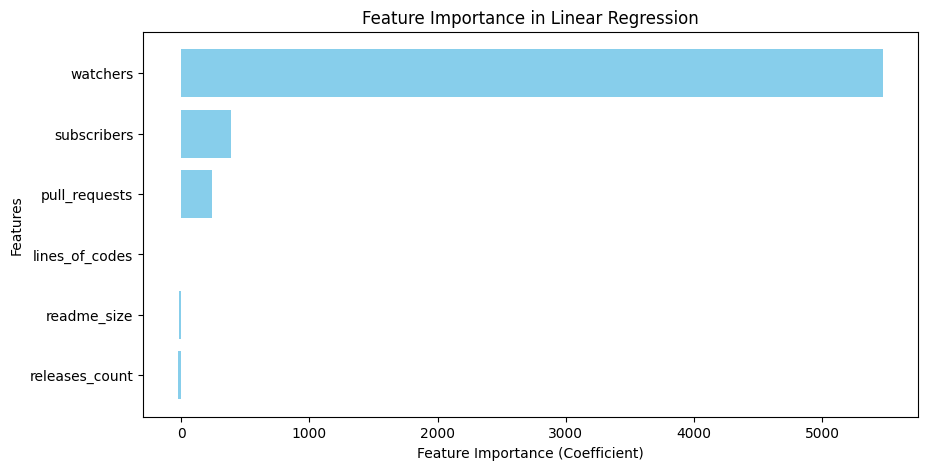

          feature  coefficient
0        watchers  5473.741699
1     subscribers   389.145142
3   pull_requests   236.546097
5  lines_of_codes    -1.525735
4     readme_size   -19.625858
2  releases_count   -21.997719


In [54]:
features = ['watchers', 'subscribers', 'releases_count', 'pull_requests', 'readme_size', 'lines_of_codes']
linear_regression(features, 'popularity_score_3', df)